# **AIRLINE DELAY AND CANCELLATION**

This is a brief visualization about the airline delays and cancellations of United States Domestic Carriers across US which helps to understand the reasons of cancellations and when was the dela for which airlines. 

All the Files were uploaded in google Drive. 
So, First colab needs to be patched up with google dirve.
To do this google frive should be mounted on colab so that datasets are available in colab local library.

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This is just a process where we confirmed that data is been fetched properly by printng two rows from one of the dataset 2009.csv

In [ ]:
import pandas as pd
data = pd.read_csv("/content/gdrive/MyDrive/ADC/ADCdataset/2009.csv")
data.head(2)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning Process**

Here, we created the dataframe called concatenated_df which will help perform the operations on the dataset. 

*1. Importing and Combining the dataset*

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("/content/gdrive/MyDrive/ADC/ADCdataset")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
# Preview the first 5 lines of the loaded data 
#combine all files in the list
concatenated_df   = pd.concat((pd.read_csv(f,usecols=['FL_DATE','OP_CARRIER','ARR_DELAY','DEP_DELAY','CANCELLATION_CODE','CANCELLED','DIVERTED']) for f in all_filenames), ignore_index=True)
concatenated_df.head()

['2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', 'Copy of 2018.csv']


,FL_DATE,OP_CARRIER,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED
0,2009-01-01,XE,-2.0,4.0,0.0,NaN,0.0
1,2009-01-01,XE,-1.0,-8.0,0.0,NaN,0.0
2,2009-01-01,XE,-1.0,-9.0,0.0,NaN,0.0
3,2009-01-01,XE,9.0,-12.0,0.0,NaN,0.0
4,2009-01-01,XE,-10.0,-38.0,0.0,NaN,0.0


*2. Checking Unique values of Airlines(OP_CARRRIER) column*

In [ ]:
concatenated_df["ARR_DELAY"].fillna(0)
concatenated_df["DEP_DELAY"].fillna(0)
concatenated_df['ARR_DELAY'] = concatenated_df["ARR_DELAY"].fillna(0)
concatenated_df['DEP_DELAY'] = concatenated_df["DEP_DELAY"].fillna(0)
concatenated_df.head()

,FL_DATE,OP_CARRIER,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED
0,2009-01-01,XE,-2.0,4.0,0.0,NaN,0.0
1,2009-01-01,XE,-1.0,-8.0,0.0,NaN,0.0
2,2009-01-01,XE,-1.0,-9.0,0.0,NaN,0.0
3,2009-01-01,XE,9.0,-12.0,0.0,NaN,0.0
4,2009-01-01,XE,-10.0,-38.0,0.0,NaN,0.0


# **Data Transformation**

*3. Renaming airline codes to company names*, Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

In [ ]:
concatenated_df.OP_CARRIER.unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'VX', 'NK', 'G4',
       'YX'], dtype=object)

In [ ]:
concatenated_df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',     
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'FL':'Florida Airlines',
    'NW':'Northwest Airlines',
    'US':'US Airlines',
    'XE':'ExpressJet Airlines',
    'CO':'Continental Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
concatenated_df.OP_CARRIER.unique()

array(['ExpressJet Airlines', 'Mesa Airline', 'Northwest Airlines',
       'PSA Airlines', 'SkyWest Airlines', 'United Airlines',
       'US Airlines', 'Southwest Airlines', 'ExpressJet',
       'Frontier Airlines', 'Florida Airlines', 'Hawaiian Airlines',
       'Envoy Air', 'Endeavor Air', 'American Airlines',
       'Alaska Airlines', 'JetBlue Airways', 'Continental Airlines',
       'Delta Airlines', 'Virgin America', 'Spirit Airlines',
       'Allegiant Air', 'Republic Airways'], dtype=object)

*4. Replacing Cancellation Code*

In [ ]:
concatenated_df['CANCELLATION_CODE'].replace({
    'A':'Airline cancellation',
    'B':'Weather cancellation',
    'C':'NAS cancellation',
    'D':'Security cancellation',
},inplace=True)
concatenated_df.CANCELLATION_CODE.unique()

array([nan, 'Airline cancellation', 'Weather cancellation',
       'NAS cancellation', 'Security cancellation'], dtype=object)

*5. Conversion of Date into Day, Month, Year*

In [ ]:
concatenated_df['FL_DATE_YEAR'] = pd.to_datetime(concatenated_df['FL_DATE']).dt.year

In [ ]:
concatenated_df.head()

,FL_DATE,OP_CARRIER,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,FL_DATE_YEAR
0,2009-01-01,ExpressJet Airlines,-2.0,4.0,0.0,NaN,0.0,2009
1,2009-01-01,ExpressJet Airlines,-1.0,-8.0,0.0,NaN,0.0,2009
2,2009-01-01,ExpressJet Airlines,-1.0,-9.0,0.0,NaN,0.0,2009
3,2009-01-01,ExpressJet Airlines,9.0,-12.0,0.0,NaN,0.0,2009
4,2009-01-01,ExpressJet Airlines,-10.0,-38.0,0.0,NaN,0.0,2009


In [ ]:
type(concatenated_df['FL_DATE'])

pandas.core.series.Series

In [ ]:

pd.to_datetime(concatenated_df.FL_DATE)
concatenated_df['FL_DATE_YEAR'] = pd.to_datetime(concatenated_df['FL_DATE']).dt.year
concatenated_df['FL_DATE_MONTH'] = pd.to_datetime(concatenated_df['FL_DATE']).dt.month
concatenated_df['FL_DATE_DAY'] = pd.to_datetime(concatenated_df['FL_DATE']).dt.day
#concatenated_df['MonthYear'] = concatenated_df['FL_DATE'].dt.to_period('M')


concatenated_df['FL_DATE'] = pd.to_datetime(concatenated_df['FL_DATE'])

In [ ]:
concatenated_df.isnull().sum()
concatenated_df['FL_DATE_MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 10])

# **Data Visualization**

ARRIVAL DELAY OF AIRLINES

This was just a understanding of how it would look using maxplotlib

Text(0.5, 1.0, 'ARRIVAL delays by Year')

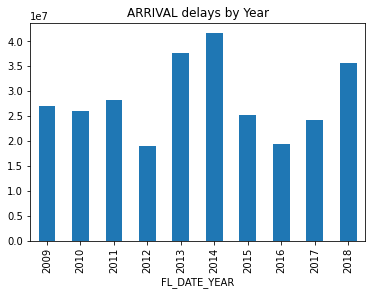

In [ ]:
concatenated_df.groupby('FL_DATE_YEAR').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by Year')

In [ ]:
# Filter out non-delayed flights < 0 DEP_DELAY
concatenated_Delay_df = concatenated_df[(concatenated_df['ARR_DELAY'] > 0)]
# Minutes to hours 
concatenated_Delay_df['ARR_DELAY'] = concatenated_Delay_df['ARR_DELAY'] / 60

# Minutes to hours 
concatenated_Delay_df['DEP_DELAY'] = concatenated_Delay_df['DEP_DELAY'] / 60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)
#ARR_DELAY_df = [concatenated_df.groupby(("FL_DATE_MONTH"))["ARR_DELAY"].sum()]
ARR_DELAY_df = concatenated_Delay_df.groupby("FL_DATE", as_index=False)["ARR_DELAY"].sum()
ARR_DELAY_df.set_index("FL_DATE")
DEP_DELAY_df = concatenated_Delay_df.groupby("FL_DATE", as_index=False)["DEP_DELAY"].sum()
#DEP_DELAY_df.set_index("FL_DATE")
fig = px.line(ARR_DELAY_df,x = "FL_DATE", y = "ARR_DELAY")
fig.update_xaxes(rangeslider_visible=True)

#fig.add_trace(
 #   go.Scatter(x=list(ARR_DELAY_df.FL_DATE), y=list(ARR_DELAY_df.ARR_DELAY)))

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=2,
                     label="2y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


fig.show()


<Figure size 1800x864 with 0 Axes>

DEPARTURE DELAY OF AIRLINES

In [ ]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)
DEP_DELAY_df = concatenated_Delay_df.groupby("FL_DATE", as_index=False)["DEP_DELAY"].sum()
DEP_DELAY_df.set_index("FL_DATE")
fig = px.line(DEP_DELAY_df,x = "FL_DATE", y = "DEP_DELAY", title='DEPARTURE DELAY' )
fig.update_xaxes(rangeslider_visible=True)

#fig.add_trace(
 #   go.Scatter(x=list(ARR_DELAY_df.FL_DATE), y=list(ARR_DELAY_df.ARR_DELAY)))

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=2,
                     label="2y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


fig.show()


<Figure size 1800x864 with 0 Axes>

CANCELLATION OF AIRLNES BAR GRAPH

In [ ]:
import plotly.express as px
import pandas as pd
import os
import glob
os.chdir("/content/gdrive/MyDrive/ADC/ADCdataset")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

concatenated_df   = pd.concat((pd.read_csv(f,usecols=['FL_DATE','OP_CARRIER','ARR_DELAY','DEP_DELAY','CANCELLATION_CODE','CANCELLED','DIVERTED']) for f in all_filenames), ignore_index=True)
concatenated_df['FL_DATE_YEAR'] = pd.to_datetime(concatenated_df['FL_DATE']).dt.year
concatenated_df['OP_CARRIER']=concatenated_df['OP_CARRIER'].replace({
     'UA':'United Airlines',
     'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'FL':'Florida Airlines',
    'NW':'Northwest Airlines',
    'US':'US Airlines',
    'XE':'ExpressJet Airlines',
    'CO':'Continental Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
})

df = concatenated_df[['OP_CARRIER', 'FL_DATE_YEAR', 'CANCELLED']].groupby(['OP_CARRIER', 'FL_DATE_YEAR']).sum().reset_index()
df
fig = px.bar(df, x="OP_CARRIER", y="FL_DATE_YEAR", color="OP_CARRIER", title='Cancellation of Airlines per year')

fig.show()

['2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', 'Copy of 2018.csv']


REASON OF CANCELLATION OF AIRLINES ACCORDING TO CANCELLATION CODE - DROP DOWN BAR GRAPH

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
concatenated_df['CANCELLATION_CODE'].replace({
    'A':'Airline cancellation',
    'B':'Weather cancellation',
    'C':'NAS cancellation',
    'D':'Security cancellation',
},inplace=True)
cancellationCode = concatenated_df[concatenated_df['CANCELLED'] == 1.0]
cancellationCode.head()
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

cancellationCode.head()

cancellationCode_df = cancellationCode.groupby(['OP_CARRIER','CANCELLATION_CODE'])["CANCELLATION_CODE"].size().reset_index(name='counts')
cancellationCode_df.set_index('OP_CARRIER')
fig = go.Figure()
country_list = list(cancellationCode_df['OP_CARRIER'].unique())
i=0
j=0
for country in country_list:
    fig.add_trace(
      go.Bar(
         x = cancellationCode_df['CANCELLATION_CODE'][cancellationCode_df['OP_CARRIER']==country],
         y = cancellationCode_df['counts'][cancellationCode_df['OP_CARRIER']==country],
         visible = 'legendonly',name = str(country)+ str(i),text = cancellationCode_df['counts'][cancellationCode_df['OP_CARRIER']==country],
            textposition='auto', 
        )
    )
    i= i+1
for country in country_list:
    fig.add_trace(   
      go.Scatter(
          x = cancellationCode_df['CANCELLATION_CODE'][cancellationCode_df['OP_CARRIER']==country],
          y = cancellationCode_df['counts'][cancellationCode_df['OP_CARRIER']==country],mode ='markers',
          visible = 'legendonly',name = str(country)+'_'+ str(j),
        )
    )
    j = j+1
    
buttons = []
for i, country in enumerate(country_list):
    args = [False] * len(country_list)
    args[i] = True
    
    button = dict(label = country,
                  method = "update",
                  args=[{"visible": args}])
    
    buttons.append(button)
    
fig.update_layout(
    updatemenus=[dict(
                    active=0,
                    type="dropdown",
                    buttons=buttons,
                    x = 0,
                    y = 1,
                    xanchor = 'left',
                    yanchor = 'bottom'
                )], 
    autosize=False,
    width=1000,
    height=800,
    title="Cancellation Reason Count by Airline Carrier",
    xaxis_title="Cancellation Reason",
    yaxis_title="Cancellation Count ",
)
fig.for_each_trace(
    lambda trace: trace.update(visible=True) if trace.name == "Alaska Airlines0" else (),
)
fig.for_each_trace(
    lambda trace: trace.update(visible=True) if trace.name == "Alaska Airlins_0" else (),
)

<Figure size 1800x864 with 0 Axes>